In [19]:
import torch
import diffusers
from utils import optimize_prompt, optimize_chunk
from PIL import Image
import transformers

In [20]:
img = Image.open("./NewWorldDisciples-1000.jpeg")

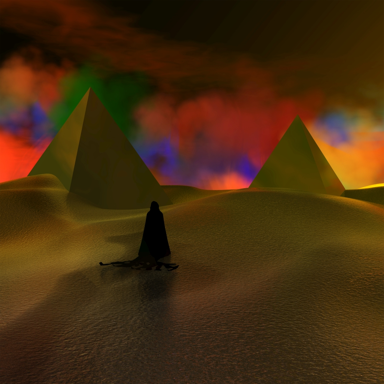

In [22]:
img.resize((384, 384))

In [99]:
pipe = diffusers.StableDiffusionPipeline.from_pretrained("Lykon/Dreamshaper").to("cuda",torch.float16)
pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = diffusers.EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.safety_checker = None

clip_model = transformers.CLIPModel.from_pretrained("openai/clip-vit-large-patch14").to("cuda",torch.float16)
clip_processor = transformers.CLIPImageProcessor()


In [150]:
og_prompt = "A desert scene"
negative_prompt = "low quality"

prompt_embeds, negative_prompt_embeds, _, __ = optimize_prompt(pipe.tokenizer, 
                                                                pipe.text_encoder,
                                                                clip_model,
                                                                clip_processor,
                                                                clip_model.text_projection,
                                                                og_prompt,
                                                                [img],
                                                                og_prompt,
                                                                1,
                                                                negative_prompt=negative_prompt,
                                                                use_negative_prompt=True,
                                                                steps=20,
                                                                lr_penalty=0.97,
                                                                lr=1.5,
                                                                optimizer="adadelta",
                                                                anchor_factor=0.0,
                                                                actual_eof=False,
                                                                num_tokens=150,
                                                                )

initial image distance tensor([1.0472], device='cuda:0')


 40%|████      | 8/20 [00:00<00:00, 13.17it/s]

too high! dropping lr


 60%|██████    | 12/20 [00:00<00:00, 12.51it/s]

too high! dropping lr


 80%|████████  | 16/20 [00:01<00:00, 12.67it/s]

too high! dropping lr


100%|██████████| 20/20 [00:01<00:00, 12.61it/s]

too high! dropping lr
final image distance 0.4778605093259226
final anchor distance 0.7036886811256409


In [151]:
image_out = pipe(prompt_embeds=prompt_embeds, negative_prompt_embeds=negative_prompt_embeds, num_inference_steps=25).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

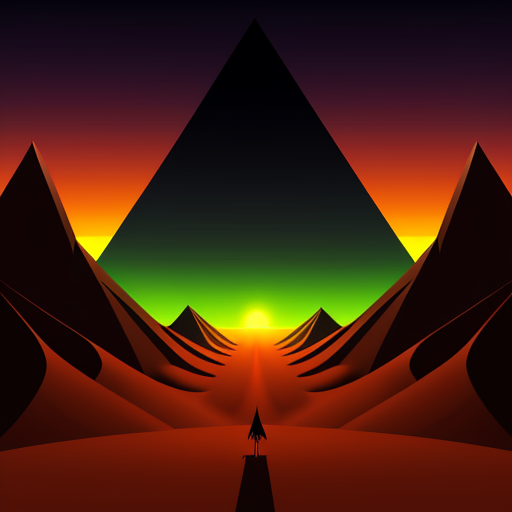

In [152]:
image_out

In [96]:
og_prompt = "Concept art of a fantasy character"
negative_prompt = "low quality"

prompt_embeds, negative_prompt_embeds, _, __ = optimize_prompt(pipe.tokenizer, 
                                                                pipe.text_encoder,
                                                                clip_model,
                                                                clip_processor,
                                                                clip_model.text_projection,
                                                                og_prompt,
                                                                [img],
                                                                og_prompt,
                                                                1,
                                                                negative_prompt=negative_prompt,
                                                                use_negative_prompt=True,
                                                                steps=15,
                                                                lr_penalty=0.97,
                                                                lr=0.5,
                                                                optimizer="asgd",
                                                                anchor_factor=0.5,
                                                                actual_eof=False,
                                                                num_tokens=100,
                                                                )

initial image distance tensor([1.0385], device='cuda:0')


  0%|          | 0/15 [00:00<?, ?it/s]

 13%|█▎        | 2/15 [00:00<00:01, 11.68it/s]

too high! dropping lr
too high! dropping lr


 80%|████████  | 12/15 [00:00<00:00, 11.90it/s]

too high! dropping lr


100%|██████████| 15/15 [00:01<00:00, 12.24it/s]

too high! dropping lr
final image distance 0.6115727865404642
final anchor distance 0.22962328791618347


In [107]:
image_out = pipe(prompt_embeds=prompt_embeds, negative_prompt_embeds=negative_prompt_embeds, num_inference_steps=25).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

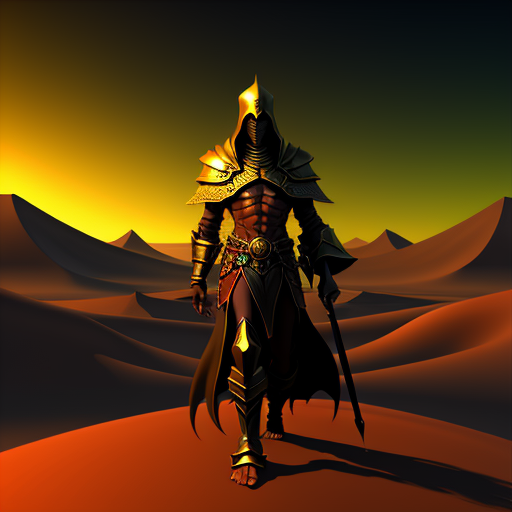

In [108]:
image_out

Optimizing chunk will maintain original prompt and append the image-optimized prompt to the end of yours

In [159]:
og_prompt = "Concept art of a fantasy character"
negative_prompt = "low quality"

prompt_embeds, negative_prompt_embeds, _, __ = optimize_chunk(pipe.tokenizer, 
                                                                pipe.text_encoder,
                                                                clip_model,
                                                                clip_processor,
                                                                clip_model.text_projection,
                                                                og_prompt,
                                                                negative_prompt,
                                                                1,
                                                                [img],
                                                                steps=15,
                                                                lr_penalty=0.97,
                                                                lr=0.5,
                                                                optimizer="asgd",
                                                                anchor_factor=0.0,
                                                                actual_eof=False,
                                                                num_tokens_chunk=100,
                                                                )

initial image distance tensor([0.9971], device='cuda:0')


 40%|████      | 6/15 [00:00<00:00, 12.08it/s]

too high! dropping lr


 80%|████████  | 12/15 [00:00<00:00, 12.45it/s]

too high! dropping lr
too high! dropping lr


100%|██████████| 15/15 [00:01<00:00, 12.06it/s]

final image distance 0.40435725450515747
final anchor distance 0.0


In [160]:
image_out = pipe(prompt_embeds=prompt_embeds, negative_prompt_embeds=negative_prompt_embeds, num_inference_steps=25).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

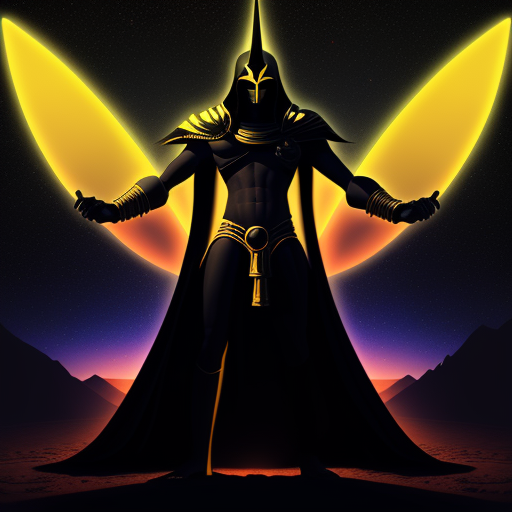

In [161]:
image_out